# logistic regression demo 

http://blog.csdn.net/han_xiaoyang/article/details/49123419

> 逻辑回归是应用非常广泛的一个分类机器学习算法，它将数据拟合到一个logit函数(或者叫做logistic函数)中，从而能够完成对事件发生的概率进行预测。

## sigmoid函数 

### 公式 

$$g(z)=\left(\frac{1}{1+e^{-z}} \right)^2$$

### 函数图 

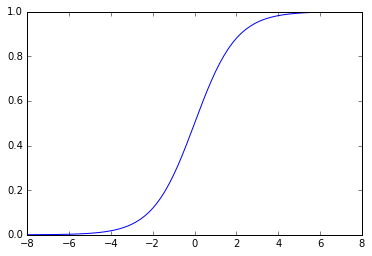

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline

def sigmoid(data):
    return [1./(1.+math.exp(-item)) for item in data]

data_x = np.arange(-8.,8.,0.1)
data_y = sigmoid(data_x)
plt.plot(data_x, data_y)

从函数图上可以看出，函数y=g(z)在z=0的时候取值为1/2，而随着z逐渐变小，函数值趋于0，z逐渐变大的同时函数值逐渐趋于1，而这正是一个概率的范围。

## 判定边界 

我们现在再来看看，为什么逻辑回归能够解决分类问题。这里引入一个概念，叫做判定边界，可以理解为是用以对不同类别的数据分割的边界，边界的两旁应该是不同类别的数据。

![划分边界图1](http://img.blog.csdn.net/20151014124124641?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center)

![划分边界图2](http://img.blog.csdn.net/20151014124156527?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center)

![划分边界图3](http://img.blog.csdn.net/20151014124241795?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center)

### 分析逻辑回归如何得到这些边界 

回到sigmoid函数，我们发现：  
$$当g(z)≥0.5时,z≥0$$
$$对于hθ(x)=g(θ^TX)≥0.5, 则θ^TX≥0, 此时意味着预估y=1$$
$$反之，当预测y=0时，θ^TX<0$$

$$所以我们认为θTX=0是一个决策边界，当它大于0或小于0时，逻辑回归模型分别预测不同的分类结果。$$

#### 第一个栗子 

$$先看第一个例子hθ(x)=g(θ_0+θ_1X_1+θ_2X_2)，其中θ_0 ,θ_1 ,θ_2分别取-3, 1, 1。$$
$$则当−3+X_1+X_2≥0时, y = 1; 则X_1+X_2=3是一个决策边界，图形表示如下，刚好把图上的两类点区分开来：$$
![demo 1](http://img.blog.csdn.net/20151014124638710?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center)

#### 第二个栗子 

例1只是一个线性的决策边界，当hθ(x)更复杂的时候，我们可以得到非线性的决策边界，例如：
$$hθ(x)=g(θ_0+θ_1X_1+θ_2X_2+θ_3X_1^2+θ_4X_2^2)$$

$$这时当x_1^2+x_2^2≥1时，我们判定y=1，这时的决策边界是一个圆形，如下图所示：$$
![demo 2](http://img.blog.csdn.net/20151014124912098?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center)

### 小结 

$$所以我们发现，理论上说，只要我们的hθ(x)设计足够合理，准确的说是g(θ^Tx)中θ^Tx足够复杂，$$
$$我们能在不同的情形下，拟合出不同的判定边界，从而把不同的样本点分隔开来。$$

## 代价函数与梯度下降 

我们通过对判定边界的说明，知道会有合适的参数θ使得$$θ^Tx=0$$成为很好的分类判定边界，那么问题就来了，我们如何判定我们的参数θ是否合适，有多合适呢？更进一步，我们有没有办法去求得这样的合适参数θ呢？

这就是我们要提到的代价函数与梯度下降了。

所谓的代价函数Cost Function，其实是一种衡量我们在这组参数下预估的结果和实际结果差距的函数，比如说线性回归的代价函数定义为: